In [1]:
import librosa
print(librosa.__version__)
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import sklearn

0.6.2


In [2]:
filename = 'C:\\Users\\kirill\\Desktop\\project_case\\Audio Analysis\\audio.mp3'
#filename = librosa.util.example_audio_file()
y, sr = librosa.load(filename)

#  Rolloff -  частота, ниже которой сосредоточено roll_percent всей спектральной энергии

# График покзывает, как меняется эта частота с течением времени

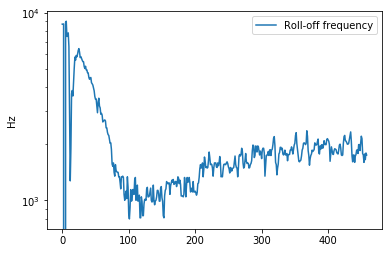

In [3]:
# Approximate maximum frequencies with roll_percent=0.85 (default)
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.85)
plt.figure()
plt.semilogy(rolloff.T, label='Roll-off frequency')
plt.ylabel('Hz')
plt.legend(loc='best')

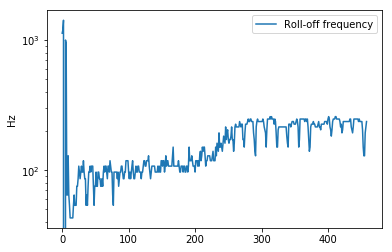

In [4]:
# Approximate minimum frequencies with roll_percent=0.1
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.1)
plt.figure()
plt.semilogy(rolloff.T, label='Roll-off frequency')
plt.ylabel('Hz')
plt.legend(loc='best')

# Spectral Centroid - взвешенное среднее всех частот, наличествующих в данном сэмпле

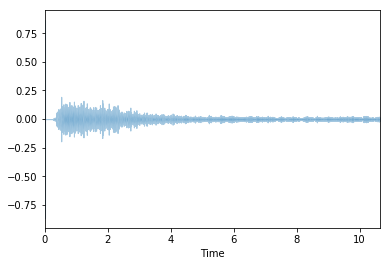

In [5]:
spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]
spectral_centroids.shape
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(y, sr=sr, alpha=0.4)


# Zero-crossing rate - количество пересечений сигналом нулевой отметки за некоторый промежуток времени

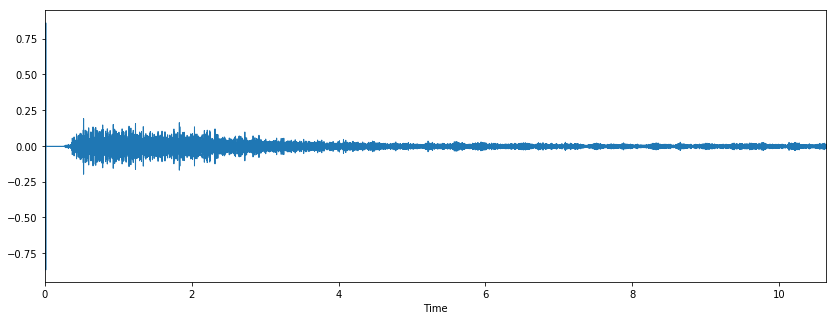

In [6]:
#Выведем сигнал
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=sr)

# На втором графике рассмотрим какой-нибудь участок поближе

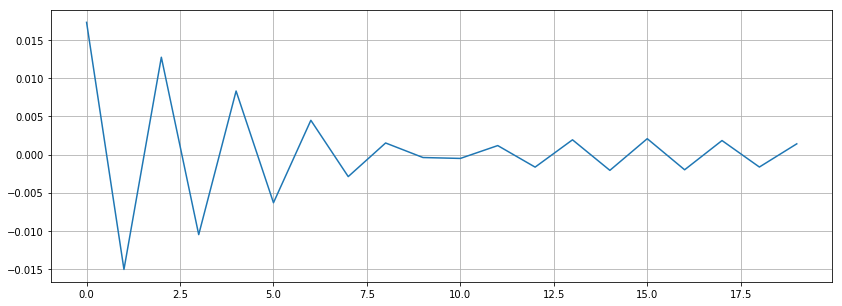

In [15]:
plt.figure(figsize=(14, 5))
plt.plot(y[200:220])
plt.grid()

# Видно, что сигнал на данном участке пересекает 0.0000 18 раз. 

In [17]:
zero_crossings = librosa.zero_crossings(y[200:220], pad=True)
print(sum(zero_crossings))
# Почему-то функция накидывает 1 лишний раз

19


# MFCCS - кепстральные коэффициенты.

[-1.61998229e-15  1.37145197e-15  1.64598424e-16  1.59422221e-15
 -8.68344370e-16 -1.90116623e-16  5.34793705e-16 -4.95367485e-16
 -1.22463163e-15 -7.64336549e-17 -1.23841871e-16  3.89772334e-16
  3.33792543e-16  3.26536184e-17  1.51899795e-16 -1.53834824e-16
 -5.65270416e-16  2.46716228e-16  2.01726798e-16  2.94124444e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


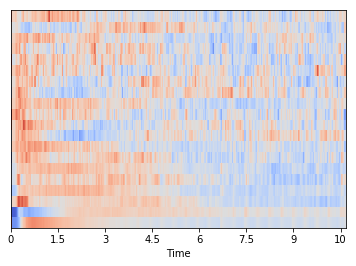

In [9]:
mfccs = librosa.feature.mfcc(y, sr=sr)
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

# Tempogram - зависимость темпа от времени

C:\Users\kirill\Anaconda3\lib\site-packages\scipy\fftpack\basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


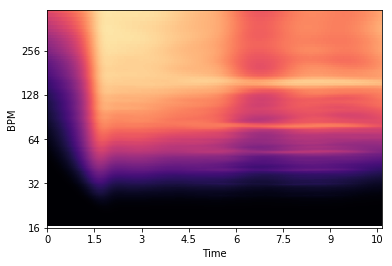

In [10]:
hop_length = 200 # samples per frame
onset_env = librosa.onset.onset_strength(y, sr=sr, hop_length=hop_length, n_fft=2048)
tempogram = librosa.feature.tempogram(onset_envelope=onset_env, sr=sr, hop_length=hop_length, win_length=400)
librosa.display.specshow(tempogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='tempo')